<a href="https://colab.research.google.com/github/ImtiazAhmed1999/Induction-motor-fault-analysis/blob/main/IM_fault_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

**Data Uploading**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving IM_fault_data.csv to IM_fault_data.csv


In [5]:
df=pd.read_csv('IM_fault_data.csv')
dir('IM_fault_data.csv')

# Seperation of Main col
X= df.drop('State', axis=1)
y= df['State']

**Split into Training and Testing**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) #testing is 20%

**KNN**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

#fit
knn.fit(X_train, y_train)

#Prediction
y_pred=knn.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8163223977318752


**Confusion Matrix and other Factors for KNN**

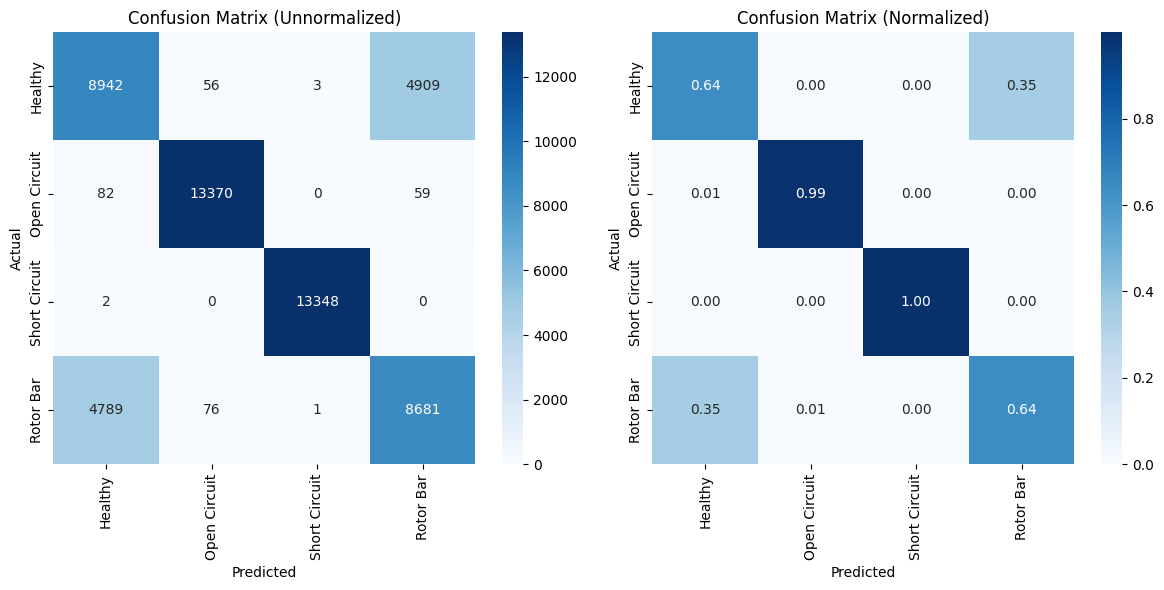

               precision    recall  f1-score   support

      Healthy       0.65      0.64      0.65     13910
 Open Circuit       0.99      0.99      0.99     13511
Short Circuit       1.00      1.00      1.00     13350
    Rotor Bar       0.64      0.64      0.64     13547

     accuracy                           0.82     54318
    macro avg       0.82      0.82      0.82     54318
 weighted avg       0.82      0.82      0.82     54318



In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot unnormalized confusion matrix
plt.figure(figsize=(12, 6))

# Unnormalized confusion matrix
plt.subplot(1, 2, 1)  # Create a subplot for the unnormalized matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Unnormalized)')

# Normalized confusion matrix (as decimal values)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalize by row

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)  # Create a subplot for the normalized matrix
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print Classification report for F1 score, Precision, and Recall
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar']))


**Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred= tree_clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7416141978717921


**Confusion Matrix and other Factors for Decision Tree**

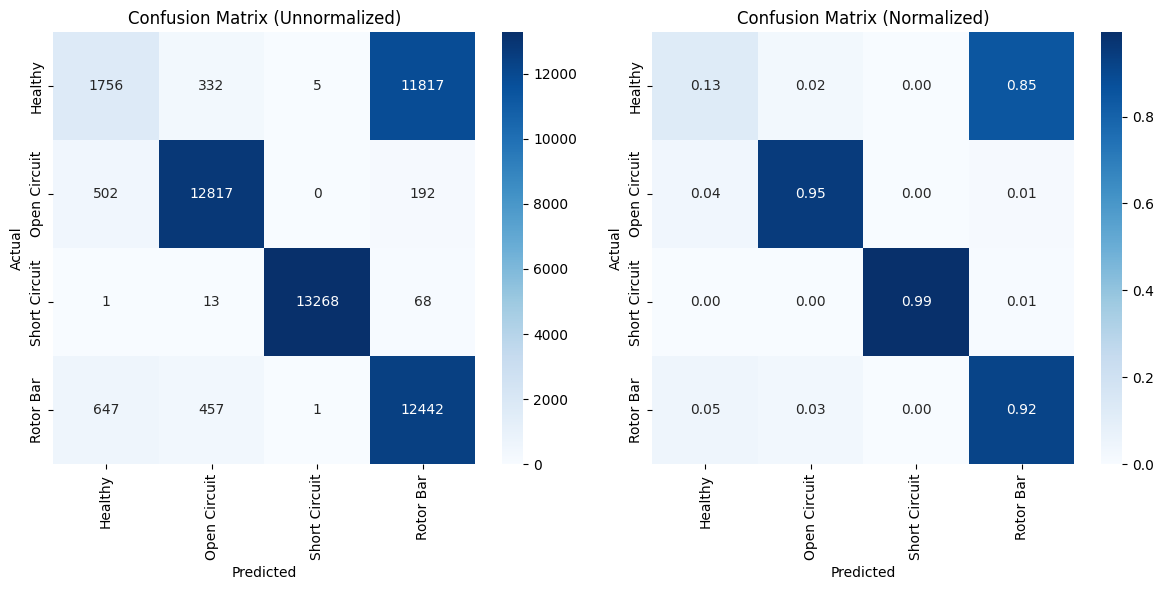

               precision    recall  f1-score   support

      Healthy       0.60      0.13      0.21     13910
 Open Circuit       0.94      0.95      0.94     13511
Short Circuit       1.00      0.99      1.00     13350
    Rotor Bar       0.51      0.92      0.65     13547

     accuracy                           0.74     54318
    macro avg       0.76      0.75      0.70     54318
 weighted avg       0.76      0.74      0.70     54318



In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot unnormalized confusion matrix
plt.figure(figsize=(12, 6))

# Unnormalized confusion matrix
plt.subplot(1, 2, 1)  # Create a subplot for the unnormalized matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Unnormalized)')

# Normalized confusion matrix (as decimal values)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalize by row

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)  # Create a subplot for the normalized matrix
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print Classification report for F1 score, Precision, and Recall
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar']))


**CatBoost**

In [11]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [12]:
from catboost import CatBoostClassifier

# Initialize and fit the CatBoost model
catboost_clf = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, random_state=4, silent=True)
catboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = catboost_clf.predict(X_test)

# Calculate and print accuracy
print("Accuracy (CatBoost):", metrics.accuracy_score(y_test, y_pred))

Accuracy (CatBoost): 0.9136750248536397


**Confusion Matrix and other Factors for Decision Tree**

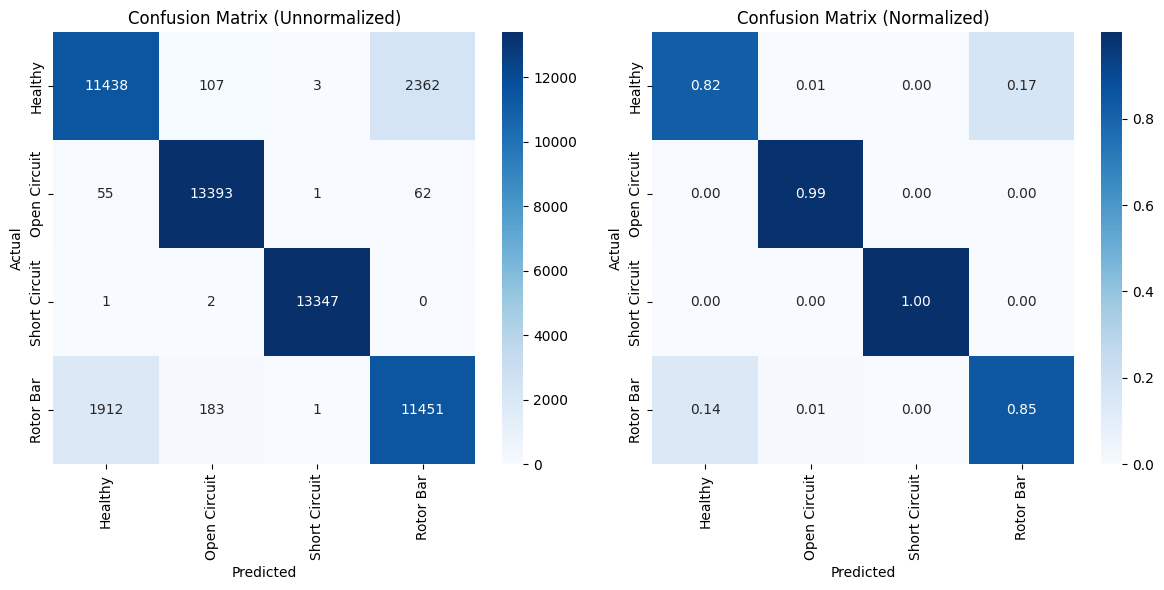

               precision    recall  f1-score   support

      Healthy       0.85      0.82      0.84     13910
 Open Circuit       0.98      0.99      0.98     13511
Short Circuit       1.00      1.00      1.00     13350
    Rotor Bar       0.83      0.85      0.84     13547

     accuracy                           0.91     54318
    macro avg       0.91      0.91      0.91     54318
 weighted avg       0.91      0.91      0.91     54318



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot unnormalized confusion matrix
plt.figure(figsize=(12, 6))

# Unnormalized confusion matrix
plt.subplot(1, 2, 1)  # Create a subplot for the unnormalized matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Unnormalized)')

# Normalized confusion matrix (as decimal values)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalize by row

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)  # Create a subplot for the normalized matrix
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'], yticklabels=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print Classification report for F1 score, Precision, and Recall
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Open Circuit', 'Short Circuit', 'Rotor Bar']))


**Training and Testing Accuracy**

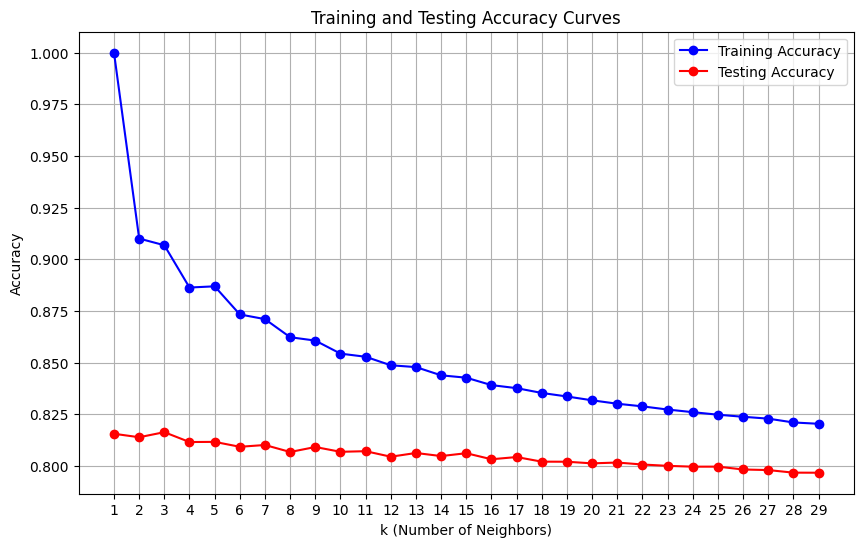

In [14]:
# Accuracy curve for training and test sets for different k values
k_range = range(1, 30)
train_acc = []
test_acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Accuracy for training set
    y_train_pred = knn.predict(X_train)
    train_acc.append(metrics.accuracy_score(y_train, y_train_pred))

    # Accuracy for test set
    y_test_pred = knn.predict(X_test)
    test_acc.append(metrics.accuracy_score(y_test, y_test_pred))

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(k_range, test_acc, label='Testing Accuracy', color='red', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curves')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

**Deep Learning**

In [15]:
!pip install tensorflow

In [16]:
!pip install keras

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

# Upload dataset
uploaded = files.upload()
# Read the CSV file
df = pd.read_csv('IM_fault_data.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Separation of features and target
X = df.drop('State', axis=1)
y = df['State']

# One-hot encode the target variable if it's categorical
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# Standardize the data (scaling to mean 0 and variance 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a deep learning model
model = Sequential()

# Add input layer (number of neurons equal to the number of features)
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer (number of neurons equal to the number of unique classes)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)

# Accuracy score
accuracy = metrics.accuracy_score(y_test_labels, y_pred)
print('Accuracy:', accuracy)

Saving IM_fault_data.csv to IM_fault_data (1).csv
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5432/5432 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7103 - loss: 0.5582 - val_accuracy: 0.7465 - val_loss: 0.3866
Epoch 2/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7511 - loss: 0.3894 - val_accuracy: 0.7637 - val_loss: 0.3783
Epoch 3/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7565 - loss: 0.3815 - val_accuracy: 0.7714 - val_loss: 0.3635
Epoch 4/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7643 - loss: 0.3699 - val_accuracy: 0.7663 - val_loss: 0.3586
Epoch 5/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7702 - loss: 0.3602 - val_accuracy: 0.7781 - val_loss: 0.3502
Epoch 6/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7794 - loss: 0.3493 - val_accuracy: 0.7801 - val_loss: 0.3555
Epoch 7/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7918 - loss: 0.3338 - val_accuracy: 0.7808 - val_loss: 0.3445
Epoch 8/50
5432/5432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8031 - loss: 0.3210 - val

**Confussion Matrix**

Confusion Matrix:
[[13014   130     4   762]
 [   47 13443     0    21]
 [    2     1 13346     1]
 [  614   189     0 12744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13910
           1       0.98      0.99      0.99     13511
           2       1.00      1.00      1.00     13350
           3       0.94      0.94      0.94     13547

    accuracy                           0.97     54318
   macro avg       0.97      0.97      0.97     54318
weighted avg       0.97      0.97      0.97     54318

Precision (Macro-Averaged): 0.9675
Recall (Macro-Averaged): 0.9677
F1-Score (Macro-Averaged): 0.9676


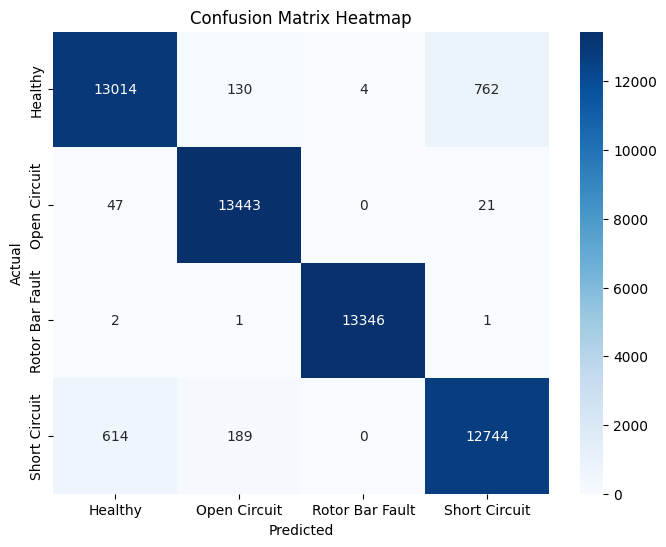

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-score for each class)
class_report = classification_report(y_test_labels, y_pred)
print("Classification Report:")
print(class_report)

# Precision, Recall, and F1-Score (for multi-class, use 'macro', 'micro', or 'weighted' averaging)
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print(f"Precision (Macro-Averaged): {precision:.4f}")
print(f"Recall (Macro-Averaged): {recall:.4f}")
print(f"F1-Score (Macro-Averaged): {f1:.4f}")

# Visualizing Confusion Matrix as a Heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Normalized Confussion Matrix**

Confusion Matrix:
[[13014   130     4   762]
 [   47 13443     0    21]
 [    2     1 13346     1]
 [  614   189     0 12744]]
Normalized Confusion Matrix:
[[9.35585909e-01 9.34579439e-03 2.87562904e-04 5.47807333e-02]
 [3.47864703e-03 9.94967064e-01 0.00000000e+00 1.55428910e-03]
 [1.49812734e-04 7.49063670e-05 9.99700375e-01 7.49063670e-05]
 [4.53236879e-02 1.39514284e-02 0.00000000e+00 9.40724884e-01]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13910
           1       0.98      0.99      0.99     13511
           2       1.00      1.00      1.00     13350
           3       0.94      0.94      0.94     13547

    accuracy                           0.97     54318
   macro avg       0.97      0.97      0.97     54318
weighted avg       0.97      0.97      0.97     54318

Precision (Macro-Averaged): 0.9675
Recall (Macro-Averaged): 0.9677
F1-Score (Macro-Averaged): 0.9676


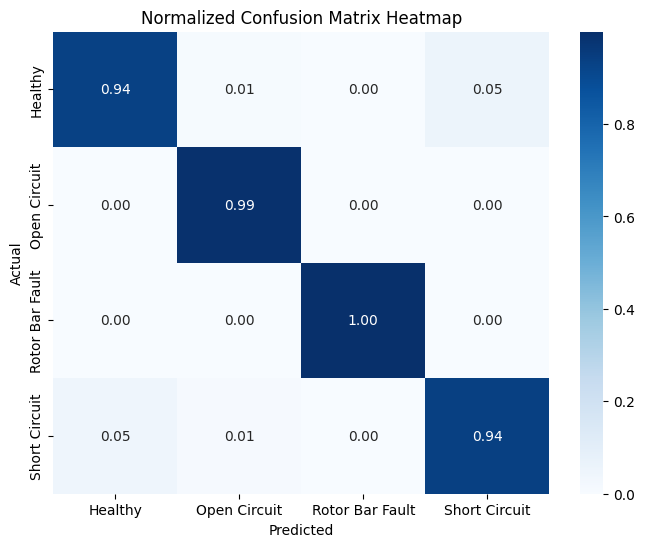

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Normalized Confusion Matrix
norm_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(norm_conf_matrix)

# Classification Report (Precision, Recall, F1-score for each class)
class_report = classification_report(y_test_labels, y_pred)
print("Classification Report:")
print(class_report)

# Precision, Recall, and F1-Score (for multi-class, use 'macro', 'micro', or 'weighted' averaging)
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print(f"Precision (Macro-Averaged): {precision:.4f}")
print(f"Recall (Macro-Averaged): {recall:.4f}")
print(f"F1-Score (Macro-Averaged): {f1:.4f}")

# Visualizing Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()